In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [42]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import random

In [25]:
raw_data = pd.read_json('C:/Users/geoff/PycharmProjects/machine_learning_assignment3/assignment3_files/food_enforcement_US_bacteria.json', orient='records')

In [26]:
print(raw_data.shape)
print(raw_data.head(25).product_description)

(6104, 26)
0     Native Catch Salmon Bacon, Traditional flavor....
1     Delish Fruit Burst 10 oz.(283 g)  Enjoy by: 8/...
2     Garden Pure Holiday Fruit Bowl 4 lbs (1.81kg) ...
3     Fresh Fruit Product is labeled in part:  "***F...
4     Ready Pac¿ Gourmet Fruit Bowl, 64oz , UPC 7774...
5     River Ranch brand Diced Grn Cabbage w/Color, 4...
6     Sweet and Sour Stir Fry packaged under the fol...
7     Onion Slab Cut.  Products are labeled in part:...
8     MIX w/yellow onions used as an ingredient.  Pr...
9     Fresh n Easy brand Shred Grn Cabbage w/Color, ...
10    River Ranch brand Three-Color Cole Slaw Mix, 1...
11    MIX w/yellow onions used as an ingredient.  Pr...
12    River Ranch brand Spring Mix, 3 lb bag, UPC: n...
13    River Ranch brand Shredded Red Cabbage, 4 x 5 ...
14    Hy Vee brand Italian Blend, 10 oz bag, UPC:  7...
15    Onions Julienne Sliced.  Products are labeled ...
16    Fresh n Easy brand Garden with Romaine, 4 x 5 ...
17    Cross Valley brand Shredded Ice

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

corpus = raw_data['product_description']
X = vectorizer.fit_transform(corpus)
X.shape

(6104, 13767)

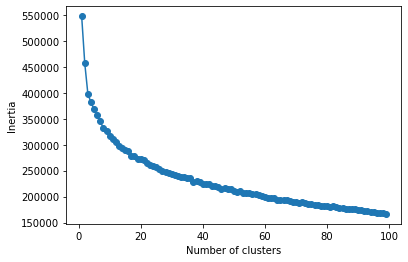

In [45]:
#elbow plot
distortions = []

for i in range (1, 100):
    km = KMeans(n_clusters=i)
    km.fit(X)
    distortions.append(km.inertia_)

# vizualize change in inertia
plt.plot(range(1, 100), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

For n_clusters = 7 The average silhouette_score is : 0.4480245401263822
For n_clusters = 16 The average silhouette_score is : 0.3178312767753816
For n_clusters = 30 The average silhouette_score is : 0.012315132255771348
For n_clusters = 33 The average silhouette_score is : 0.0721887429902115
For n_clusters = 36 The average silhouette_score is : 0.04711421711377306


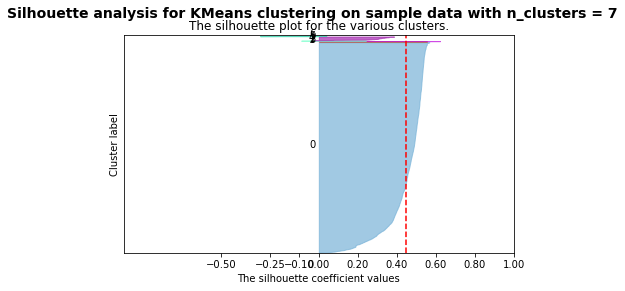

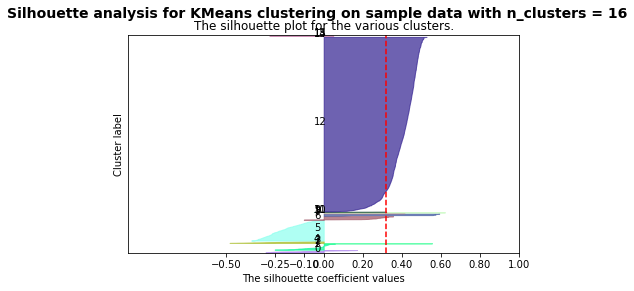

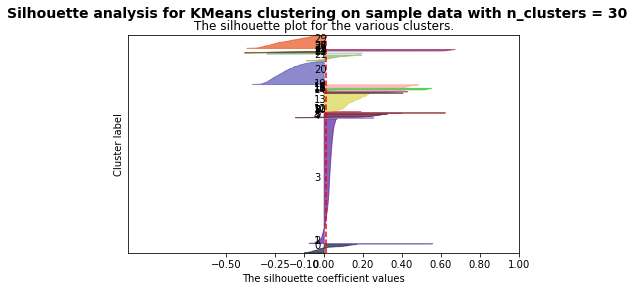

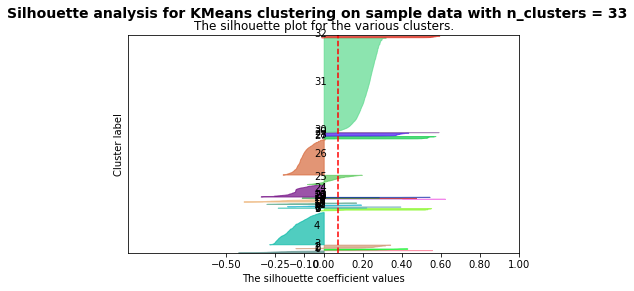

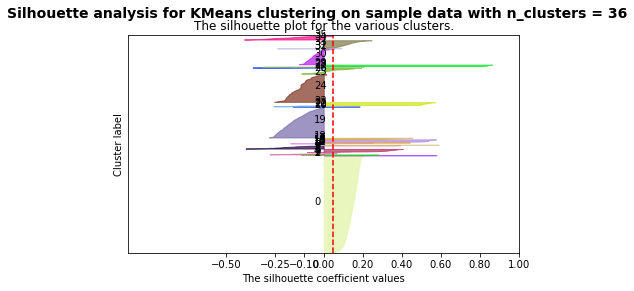

In [97]:
#silhouette analysis

range_n_clusters = [7, 16, 30, 33, 36]
#range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
#range_n_clusters = [21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
#range_n_clusters = [41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
#range_n_clusters = [61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]
#range_n_clusters = [81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
#range_n_clusters = [2, 3, 5, 11, 16, 22, 25, 35, 50, 60, 70, 75, 85, 90]
#range_n_clusters = [2, 3]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(7, 4)
    
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, X.shape[0] + (n_clusters + 1) * 10])
    #ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    #km = KMeans(n_clusters=n_clusters)
    #cluster_labels = km.fit_predict(X)
    
    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)    
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        #color = cm.nipy_spectral(float(i) / n_clusters)
        # select a random color for this cluster
        r = lambda: random.randint(0,255)
        color = '#%02X%02X%02X' % (r(),r(),r())
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.5, -0.25, -0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    #colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    #ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors/6104, edgecolor='k')

    # Labeling the clusters
    #centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    #ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

    #for i, c in enumerate(centers):
    #    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    #ax2.set_title("The visualization of the clustered data.")
    #ax2.set_xlabel("Feature space for the 1st feature")
    #ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [130]:
#####
# DESCRIPTION OF RESULTS
#
# the elbow plot for clusters up to 100 does not show any clear kinks 
# silhouette charts were run for all 2 <= n_clusters <= 100
# 
# silhouette charts for n_clusters = 7, 16, 30, 33, 36 look the most promising in terms of:
# i) fewest number of clusters with a negative silhouette coefficient
# ii) less than 4 large clusters with a negative silhouette coefficient
# iii) at least one large cluster with a positive silhouette coefficient
# iv) large numbers of small clusters with very high silhouette coefficients
#
# of these, n_clusters = 30 seems to perform the best overall
# it has only 2 larger clusters with a negative silhouette coefficient (20 and 29)
# it has 2 large clusters with a positive silhouette coefficient (3 and 13)
# it has several small clusters with very high silhouette coefficients (2, 11, 14, 15, 16, 17, 18, 19, 28)
#
# the small clusters with very high silhouette coefficients show excellent uniformity in the items within each cluster
# 
# for the 2 larger clusters with a negative silhouette coefficient (20 and 29),
# the key words that appear in these clusters have some commonalities:
# 
# cluster 20 key words: cabbage, spring mix, blended, shredded, salad, iceberg, caesar, chopped, romaine, garden, cole slaw,
#                       sprouts, seeds, kernels, carrot, salmon, trout, tuna, ice cream, sorbet, brine, pistachios, protein
#
# cluster 29 key words: macaroni, salad, potato salad, dressing, pea salad, salsa, dip, relish, salmon, onions, berries,
#                       peanut butter, ice cream, sorbet, cheese
#
# while there is some bunching of common products within both clusters 20 and 29,
# they both have a diverse mix of unrelated products too
#
# product description output for all clusters listed within this text paragraph can be found below:
# clusters: 2, 3, 11, 13, 14, 15, 16, 17, 18, 19, 20, 28, 29
#
# Overall, using n_clusters = 30 to separate the product descriptions results in several clusters that exhibit a very high
# degree of uniformity. There are two large clusters (20 and 29) where there is some degree of commonality within each cluster
# as well as a high degree of grouping of unrelated products. There are also two large clusters (3 and 13) that show very good
# uniformity in product description. Cluster 3 is made up of green beans, while cluster 13 is made up of potato salad
# and macaroni salad.
#
######

In [104]:
#fit Kmeans with k clusters
km = KMeans(n_clusters=30,n_init=30)
km.fit(X)

KMeans(n_clusters=30, n_init=30)

In [105]:
km.labels_

array([29, 21,  0, ...,  0,  8,  8])

In [131]:
#small cluster with high positive silhouette coefficient

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 2:
        print(raw_data['product_description'][i])
        print('**********')

Cut Corn, Brand Bybee's Best, Net Wt 20 lb, UPC 4635800010  Cut Corn, Brand Bybee's Best, Net Wt 55 lb, UPC 45720025  Cut Corn, Brand Bybee Foods, Net Wt 50 lb, UPC 132  Organic Supersweet White Corn, Brand Bybee Foods, Net Wt 5 lb, UPC 11000148  White Cut Corn, Brand Bybee's Best, Net Wt 20 lb, UPC 4635800034  Supersweet Cut Corn, Brand Bybee Foods Northwest Growers Select, Net Wt 5 lb, UPC 4635800043    Organic Super Sweet White Corn, Brand Columbia River Organics, Net Wt 10 oz, UPC 5711000107  Organic Sweet Yellow Corn, Brand Columbia River Organics, Net Wt 10 oz, UPC 5711000106    Cob Corn, Brand Northwest Growers Select, Net Wt 96 ct, UPC 4635800049  Cut Corn, Brand Northwest Growers Select, Net Wt 20 lb, UPC 5711000163  Cut Corn, Brand Northwest Growers Select, Net Wt 30 lb, UPC 5711000165  Cut Corn, Brand Northwest Growers Select, Net Wt 55 lb, UPC 45730579  White Supersweet Cut Corn, Brand Northwest Growers Select, Net Wt 30 lb, UPC 5711000182  5.5" Supersweet Cob Corn, Brand N

In [118]:
#large cluster with positive silhouette coefficient

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 3:
        print(raw_data['product_description'][i])
        print('**********')

Cut Green Beans, Brand Bybee Foods, Net Wt 50 lb, UPC 205050004485CR  Organic Petite Whole Green Beans, Brand Bybee Foods, Net Wt 5 lb, UPC 5711000146  1" Cut Green Beans, Brand Bybee's Best, Net Wt 20 lb, UPC 4635800012  Whole Green Beans, Brand Bybee's Best, Net Wt 15 lb, UPC 4635800018    Green Beans, Brand Chef Maxwell, Net Wt 20 lb, UPC 051849  Green Beans, Brand Chef Maxwell, Net Wt 25 lb, UPC 1-bean-grf  Green Beans, Brand Chef Maxwell, Net Wt 30 lb, UPC 3530295001  Green Beans, Brand Chef Maxwell, Net Wt 30 lb, UPC 63530295001    Organic Cut Green Beans, Brand Columbia River Organics, Net Wt 10 oz, UPC 5711000103  Organic French Cut Green Beans, Brand Columbia River Organics, Net Wt 10 oz, UPC 5711000105  Organic Petite Whole Green Beans, Brand Columbia River Organics, Net Wt 10 oz, UPC 5711000102    Green Beans, Brand Correct Choice, Net Wt 30 lb, UPC 30GBBE  Green Beans, Brand Correct Choice, Net Wt 30 lb, UPC 30GBCMI    Cut Green Beans, Brand Endico, Net Wt 20 lb, UPC 712   

In [129]:
#small cluster with high positive silhouette coefficient

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 11:
        print(raw_data['product_description'][i])
        print('**********')

Fresh Frozen Grade A Speckled Butter Beans, Net Wt. 32 oz. (2 lb.) 907 g. Dist. By Fresh Frozen Foods, Inc., Jefferson, GA 30549, UPC 0-86069-20000-1; Fresh Frozen Grade A Specked Butter Beans, Net Wt. 80 Oz. (5 lb.) 2268g, Dist. By Fresh Frozen Foods, Inc., Jefferson, GA 30549,UPC 0-86069-50000-2; Fresh Frozen Speckled Butter Beans, Net Wt. 16 oz. (1 lb.) 454 g, UPC 0-86069-20001-8
**********
Fresh Frozen Grade A Whole Okra, Net Wt. 32 Oz. (2 lb.) 907g. Dist. By Fresh Frozen Foods, Inc., Jefferson, GA 30549, UPC 0-86069-20350-7, Fresh Frozen Grade A Whole Okra, Net Wt. 80 Oz. (5 Lb.) 2268g, Dist. By Fresh Frozen Foods, Inc., Jefferson, GA 30549, Fresh Frozen Whole Okra, Net Wt. 16 Oz. (1 Lb.) 454g, UPC 0-86069-20351-4
**********
Fresh Frozen Grade A Crowder Peas, Net Wt. 32 oz. (2 lb.) 907g. Dist. By Fresh Frozen Foods, Inc., Jefferson, GA 30549, UPC 0-86069-20030-8; Fresh Frozen Grade A Crowder Peas,  Net Wt. 80 Oz. (5 lb.) 2268g, Dist. By Fresh Frozen Foods, Inc., Jefferson, GA 3054

In [119]:
#large cluster with positive silhouette coefficient

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 13:
        print(raw_data['product_description'][i])
        print('**********')

Mustard Potato Salads: 1) Copperwood Premium Mustard Potato Salad, 2 lbs., 8 11839 01001 2, 5 lbs.; 2) Dairy Fresh Mustard Potato Salad, 0 070163 89090 9, 5 lbs.; 3) Garden Fresh Mustard Potato Salad, l lb., 0 11596 14010 0, 2 lb. 0 11596 24215 6; 4) Market Pantry Mustard Potato Salad, 16 oz., 0 85239 24104 2, 3 lb., 0 85239 24100 4; 5) Spartan Mustard Potato Salad, 1 lb., 0 11213 90319 4, 3 lb., 0 11213 90324; 6) Spoon River Mustard Potato Salad, 3 lb., 0 11596 24207 8; 7) Rogges Mustard American Potato Salad, 5 lb., 0 11596 51053 3           
**********
Garden-Fresh Creamy Cole Slaw, UPC 0 11596 14022 3, 16 oz, Product Code 4022. Weis Creamy Coleslaw, UPC 0 41497 05906 5, 3 lb., Product Code 05906. Weis Creamy Coleslaw, UPC 0 11596 53101 4, 2/5 lb., Product Code 3101. Copperwood Kitchens Creamy Chopped Cole Slaw, UPC 8 11839 01020 3, 2/5 lb., Product Code 01020. Garden-Fresh Creamy Shredded Cole Slaw, UPC 0 11596 24203 3, 2 lb., Product Code 4203. Garden-Fresh Creamy Shredded Cole Sl

In [124]:
#small cluster with high positive silhouette coefficient

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 14:
        print(raw_data['product_description'][i])
        print('**********')

Acadia Natural Spring Water, 16.9 Fl Oz, Distributed by FoodHold USA, Inc, Landover, MD 20785;   Acadia Natural Spring Water, 8 Fl Oz, Distributed By: FoodHold USA, LLC, Landover, MD 20785;     Acme Natural Spring Water, 16.9 Fl Oz., Distributed By Supervalu, inc., Eden Prairie, MN 55344;     Blu all natural Spring Water, 16.9 Fl Oz, Distributed by: Millennium Food Group, Locust Valley, NY 11560;     Big Y Spring Water, 16.9 Fl Oz, Distributed by Gig Y Foods, Inc., Springfield, MA 01104;     Best Yet Spring Water, 16.9 Fl Oz, Bottled By: Niagara Bottling, LLC, Ontario, CA 91761;      7 Select Spring Water, Net Wt. 16.9 FL OZ, Distributed By: 7-Eleven, Inc., Dallas, TX 75201;     7 Select Spring Water, 33.8 Fl Oz, Distributed By 7-Eleven, Inc., Dallas  TX 75201;     Morning Fresh Farms Mountain Spring Water, 16.9 Fl Oz, Distributed By Merchants Distributors, LLC, Hickory, NC  28601;     Niagara Natural Spring Water, Net. 8 fl oz, Bottled by Niagara Bottling, LLC, Ontario, CA 91761;   Ni

In [125]:
#small cluster with high positive silhouette coefficient

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 15:
        print(raw_data['product_description'][i])
        print('**********')

Garden-Fresh,	German Potato Salad,	2/5 lb.,		0 11596 91020 8,	11/21/2013 - 12/9/2013;  Garden-Fresh,	German Potato Salad,	12/16 oz,.	0 11596 14017 9,	0 11596 14017 9,	11/25/2013 - 12/5/2013;  Garden-Fresh,	German Potato Salad,	4/48 oz..,	0 11596 34319 8,	0 00 11596 44319 5,	11/21/2013 - 12/9/2013;  Grandpa's,	German Potato Salad,	2/5 lb.,		0 11596 91023 9,	12/5/2013 - 12/14/2013;  Grandpa's,	German Potato Salad,	12/16 oz.,	0 11596 14016 2,	0 00 11596 24016 9,	12/5/2013;  
**********
Finest Traditions,	Spinach Dip	1/8 lb.,		10 733147 10123 7,	11/20/2013 - 12/9/2013  Finest Traditions,	Spinach Dip	6/8 oz.,	7 33147 10538 2,	10 733147 10539 6,	11/20/2013 - 12/11/2013  Grandpa's,	Spinach Dip,	1/5 lb.,		0 11596 55901 8,	12/23/2013- 12/31/2013  Our Own,	Spinach Dip	,1/5 lb.,		0 11596 55149 4,	12/1/2013 - 12/19/2013  Spoon River,	Spinach Dip	,1/5 lb.,		0 1159655681 9,	12/16/2013 - 12/31/2013  
**********
Garden-Fresh, American Potato Salad,,6/48 oz., 0 11596 34310 5, 0 11596 34310 5	12/3/2013 

In [126]:
#small cluster with high positive silhouette coefficient

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 16:
        print(raw_data['product_description'][i])
        print('**********')

Golden delicious whole fresh apples,   Apple Ridge 5lb, 2-3/4  apples, packaged in red net mesh bags  "	3lb, 2-1/2  apples, packaged in poly bags  "	2lb, 2-1/2  apples, packaged in poly bags  "	45ct individual apples on trays with re-useable plastic container boxes  "	50ct, individual apples on trays with re-useable plastic container boxes  "	55ct, individual apples on trays with re-useable plastic container boxes  "	60ct  individual apples on trays with re-useable plastic container boxes  "	78ct individual apples on trays with re-useable plastic container boxes  "	50ct, individual apples on trays in cardboard tray  boxes  "	55ct, individual apples on trays in cardboard tray  boxes      
**********
Fuji, whole fresh apples,   Apple Ridge 5lb, 2-3/4  apples, packaged in red net mesh bags  "	3lb, 2-1/2  apples, packaged in poly bags  "	2lb, 2-1/2  apples, packaged in poly bags  "	45ct individual apples on trays with re-useable plastic container boxes  "	50ct, individual apples on trays w

In [127]:
#small cluster with high positive silhouette coefficient

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 17:
        print(raw_data['product_description'][i])
        print('**********')

Italian Green Beans. Product is IQF frozen, not ready to eat, each label carries cooking instructions.      Packages sizes: 14 oz.; 16 oz.; 2 lbs.; 2.5 lbs.; 20 lbs. and 1,350 lbs. (tote)    Product is sold under brands: Birds Eye (C&W), Markson First Crop, Bountiful Harvest, River Valley, Simplot Classic, Sysco Classic, Sysco Imperial, National, Monarch, Valamont, Worlds Finest, Tasteful and totes .    Labels read in part:   Item # 70332-00052 (not on label).    "***BIRDS EYE C&W ***cut italian green beans***14oz***(UPC) 0 70332 00052 8***" Proof, of bag label. provided. Shipper case UPC Code 10070332000525.    Item # 23234-13195 (not on label).    "***12/2 LB***334400***MARKSON FIRST CROP*** Case label and proof of generic bag label provided.  Generic labels are stamped with Net Wt.. during production. No UPC Code - Generic Bag; Shipper Case UPC Code 10723234131957.    Item # 22486-11893 is contained on case label  "***12/2.5 LB BAGS NET WT. 30 LBS***22486***11893***1614***Bountiful 

In [128]:
#small cluster with high positive silhouette coefficient

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 18:
        print(raw_data['product_description'][i])
        print('**********')

Green Peas, Brand Bybee's Best, Net Wt 20 lb, UPC 4635800011  Green Peas, Brand Byee Foods, Net Wt 50 lb, UPC 155000007785CR  Organic Sweet Baby Peas, Brand Bybee Foods, Net Wt 5 lb, UPC 5711000145    Organic Petite Peas, Brand Columbia River Organics, Net Wt 10 oz, UPC 5711000109    Green Peas, Brand Northwest Growers Select, Net Wt 20 lb, UPC 5711000152  Green Peas, Brand Northwest Growers Select, Net Wt 55 lb, UPC 45721084  Organic Peas, Brand Northwest Growers Select, Net Wt 30 lb, UPC 5711000155    Organic Baby Peas, Brand Organic by Nature, Net Wt 16 oz, UPC 4635800069  Organic Green Peas, Brand Organic by Nature, Net Wt 50 lb, UPC R01790  Organic Sweet Baby Peas, Brand Organic by Nature, Net Wt 5 lb, UPC 4635800063  Organic Sweet Peas, Brand Organic by Nature, Net Wt 2.5 kg, UPC 4635800061    Peas, Brand Chef Maxwell, Net Wt 20 lb, UPC 051849  Green Peas, Brand Chef Maxwell, Net Wt 30 lb, UPC 3530295003    Green Peas, Brand Correct Choice, Net Wt 30 lb, UPC 30PBE    Peas, Brand 

In [120]:
#small cluster with high positive silhouette coefficient

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 19:
        print(raw_data['product_description'][i])
        print('**********')

Not Ready to Eat, IQF Mixed Vegetables.  Products' labels contains Cooking Instructions. Products are sold under various brands and various net weight.         Heinz Mixed Vegetables	02521-39698	14902521396989	4902521396982	12/1 KG   Heinz Mixed Vegetables	02521-39698	14902521396989	4902521396982	12/1 KG   Heinz Mixed Vegetables	02521-39698	14902521396989	4902521396982	12/1 KG   Heinz Mixed Vegetables	02521-39698	14902521396989	4902521396982	12/1 KG   Heinz Mixed Vegetables	02521-39698	14902521396989	4902521396982	12/1 KG  Bountiful Harvest 5 Way Mixed Veg	22486-11912	00822486119126	N/A	30 LB  Festival Mixed Vegetables	FECEX-2K688	N/A	4967777005019	12/1 KG   Festival Mixed Vegetables	FECEX-2K688	N/A	4967777005019	12/1 KG   Garden Fresh Mixed Vegetables	64775-37371	10064775373711	N/A	30 LB   Garden Fresh Mixed Vegetables	64775-37371	10064775373711	N/A	30 LB   Garden Fresh Mixed Vegetables	64775-47370	10064775473701	N/A	20 LB  Garden Fresh Mixed Vegetables	64775-47370	10064775473701	N/A	

In [121]:
#large cluster with negative silhouette coefficient

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 20:
        print(raw_data['product_description'][i])
        print('**********')

Fresh Fruit Product is labeled in part:  "***Fresh Island Medley***1 LB (454g)***Best If Sold By***Ingredients:  Pineapple, Mango, Papaya.***Packed in its own juice***Distributed by:  Winn-Dixie Stores Inc. Jacksonville, FL 32254***For Nutrition Information Call 1-888-449-9386***P-009***0 21140 01696 6***PERISHABLE KEEP REFRIGERATED***"
**********
Onion Slab Cut.  Products are labeled in part:  "***Onions Yellow Slab***Ready To Eat Product***LB***"         "***FP CENTRAL FL. FRESHCUTS ONIONS, FC YELLOW SLAB***RT # FC***"    Item # 514064 ONIONS, FC YELLOW SLAB 1/16" 2/5#  Item # 514058 ONIONS, FC YELLOW SLAB 1/4" 4/5#;   Item # 514034 ONIONS, FC YELLOW SLAB 3/8" NO 4/5#;  Item # 481155 ONIONS, FC YELLOW SLAB CUT 1/8 2/5#.          
**********
MIX w/yellow onions used as an ingredient.  Product may be labeled in part:  "***Mixes Tropical Salsa***Ready To Eat Product 2/5 LB***"    "***FP CENTRAL FL. FRESHCUTS MIXES, FC TROPICAL SALSA***2/5#***RT # FC***"    Item # 597778  MIXES, FC TROPI

Gills Onions were used in this product.     The product listed below is prepared at Whole Foods Market and distributed in their retail chef's case or on the self-service bar. It was not sold labeled.    CHUNKY RANCH VEGETABLE SALAD NO OIL ADDED
**********
Gills Onions were used in this product.     The product listed below is prepared at Whole Foods Market and distributed in their retail chef's case or on the self-service bar. It was not sold labeled.    SHRIMP WITH SNOW PEAS
**********
Trader Joe's Roasted Butternut Squash, Red Quinoa and Wheatberry Salad, 9.5 oz. Product packaged in plastic tray with plastic lid. 18 units/basket.
**********
Ranch Dressing No Oil Added sold at the chef's case, self service bar, or packaged.  Packaged product is labeled as listed below:    "WHOLE FOODS MARKET***RANCH DRESSING NO OIL ADDED***TOFU ( WATER, SOYBEANS, ISOLATED SOY PROTEIN, GLUCONOLACTONE & CALCIUM CHLORIDE), OAT MILK, LEMON JUICE, ONION, WHITE VINEGAR, DIJON MUSTARD ( DISTILLED VINEGAR, WA

In [122]:
#small cluster with high positive silhouette coefficient

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 28:
        print(raw_data['product_description'][i])
        print('**********')

UPC 1373312015,  Meijer Peanut Butter Dark Chocolate Protein Bars,Best By/Date Code:  DEC 05 16,  JAN 04 17.    UPC 3225108607, Family Gourmet Peanut Butter Dark Chocolate Protein ,Bars Best By/Date Code: JAN 04 17.    UPC 3680039453,	Food Club Peanut Butter Dark Chocolate Protein Bars,Best By/Date Code: DEC 05 16, JAN 04 17.    UPC 4130304540,	Essential Everyday Peanut Butter Dark Chocolate Protein Bars,  Best By/Date Code:	DEC 05 16, JAN 04 17.    UPC 5042847944 , Gold Emblem Peanut Butter Dark Chocolate Protein Bars ,Best By/Date Code:  DEC 05 16, JAN 04 17, JAN 05 17.    UPC 7003863811, Best Choice Peanut Butter Dark Chocolate Protein Bars,Best By/Date Code: DEC 05 16,  JAN 04 17.    UPC 7025322720, Our Family Peanut Butter Dark Chocolate Protein Bars,Best By/Date Code: DEC 05 16, JAN 04 17.    UPC 7078447478,  Tops Peanut Butter Dark Chocolate Protein Bars, Best By/Date Code: JAN 04 17.    UPC 7874203428,  Great Value Peanut Butter Dark Chocolate Protein Bars, Best By/Date Code: 1

In [123]:
#large cluster with negative silhouette coefficient

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 29:
        print(raw_data['product_description'][i])
        print('**********')

Native Catch Salmon Bacon, Traditional flavor.  UPC 7 83583 27965 9.     Traditional Salmon Bacon is ground and seasoned skinless/boneless salmon, extruded, peppered, smoked, cooled and vacuum packed in 8 oz., 14 oz., and 5 lbs. clear vacuum bags.  Label states keep refrigerated or frozen".    
**********
Conch Salad w/onions.  Product is labeled in part:  "***KEYS FISHERIES CONCH SALAD***Ingredients Ground Conch, Fresh tomatoes, Fresh Cucmber, Mojo (grapefruit juice, lime juice, orange juice, extra virgin olive oil, garlic, onion, sugar, spices, cumin) Tomatoe juice, Line juice, Parsley, Black pepper, Salt, Spices, Paprika.***FRESH PRODUCT KEEP REFRIGERATED***"    CODE: 07294144950    Product was packaged in 5 lb plastic containers with 4 per case.    Onions used in the manufacture of the above item is subject to recall for Listeria monocytogenes.
**********
Seasonal Berries with the Item # 028-02071 and the  UPC for case 0 45009 02063 5, UPC for package 0 45009 02017 8;  Case label 